<a href="https://colab.research.google.com/github/DYGITHUT/100-doors-challenge/blob/main/Task_3P_using_Azure_ML_Using_Python_SDK_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 3P using Azure ML Using Python SDK

# Objective:
These are the objectives of this file:
1. Use Azure Machine learning Python SDK to train and deploy your best built model ( Random Forest)
2.  the built model using Python
3. Model deployment using Azure Python SDK and dependencies


# Prerequisites:
Install the required libraries to enable access to Azure ML.

In [2]:
# Importing libraries
# Install libraries required to access the Azure ML services
!pip install azure-ai-ml
!pip install azure-identity
!pip install azureml-core

!pip install azureml-opendatasets

!pip install mlflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

  Using cached mlflow-2.11.2-py3-none-any.whl (19.7 MB)
  Using cached GitPython-3.1.42-py3-none-any.whl (195 kB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl (128 kB)
  Using cached gunicorn-21.2.0-py3-none-any.whl (80 kB)
  Using cached Mako-1.3.2-py3-none-any.whl (78 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached graphql_core-3.2.3-py3-none-any.whl (202 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl (16 kB)
  Using cached aniso8601-9.0.1-py2.py3-none-any.whl (52 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [1]:
! pip install python-dotenv

## Importing necessary libraries

In [3]:
# to connect to the Azure ML resource
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# to read the local environment variables and secret keys
from dotenv import load_dotenv
load_dotenv()
import os, dotenv

# to track the model using Azure MLStudio
import mlflow
import mlflow.sklearn

import joblib

# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
# import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

# Case Study

## Problem Statement

This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

### Data Ingestion

 Data ingestion from csv file downloaded from https://archive.ics.uci.edu/dataset/336/chronic%2Bkidney%2Bdisease

In [4]:
df= pd.read_csv('chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#Checking data info for datatype and high level missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     398 non-null    object
 16  wbcc    397 non-null    object
 17  rbcc    399 non-null    object
 18  htn     400 non-null    object
 19  dm      394 non-null    object
 20  cad     398 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

### Data Cleaning

from the above we see that there are no null values present but we have seen that "?" are present which needs to be removed in order to get correct numbers of missing fields

In [6]:
# replacing "?" with null values and again checking the null values
#The df.replace replaces “?” with any values that we want. In this case we are replacing with nulls
# again checking with df.info()

df = df.replace("?",np.NaN)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     328 non-null    object
 16  wbcc    292 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      392 non-null    object
 20  cad     396 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

from above we can see that all fields are read as object but in question we have we many fields which are numercial or nominal. SO converting the fields into numerical/nominal

In [8]:
numerical = ["age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
for i in numerical:
    df[i] = df[i].astype(float)

In [9]:
df.shape

(400, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     328 non-null    float64
 16  wbcc    292 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      392 non-null    object 
 20  cad     396 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [11]:
# rename column names to understand the variables

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [12]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.000000,80.000000,1.020000,1.000000,0.000000,NaN,normal,notpresent,notpresent,121.000000,36.000000,1.200000,NaN,NaN,15.400000,44.000000,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.000000,50.000000,1.020000,4.000000,0.000000,NaN,normal,notpresent,notpresent,NaN,18.000000,0.800000,NaN,NaN,11.300000,38.000000,6000.000000,NaN,no,no,no,good,no,no,ckd
2,62.000000,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,53.000000,1.800000,NaN,NaN,9.600000,31.000000,7500.000000,NaN,no,yes,no,poor,no,yes,ckd
3,48.000000,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32.000000,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.000000,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,26.000000,1.400000,NaN,NaN,11.600000,35.000000,7300.000000,4.600000,no,no,no,good,no,no,ckd


In [13]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,328.000000,292.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.871951,8413.698630,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.000955,2951.733840,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [15]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan 'no'] values

peda_edema has ['no' 'yes' nan 'good'] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [17]:
#We can see above that diabetes_mellitus values has 'yes' and ' yes' which needs to cleaned to single 'yes'
#appetite has should have only 2 values "good" or "poor". So replacing no with 'poor'
#peda_edema should have only 2 values 'yes' or 'no'. So replacing "good" with "yes"

In [18]:
df["diabetes_mellitus"] = df["diabetes_mellitus"].replace(' yes', 'yes')
df["appetite"] = df["appetite"].replace('no', 'poor')
df["peda_edema"] = df["peda_edema"].replace('good', 'yes')

In [19]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [20]:
#Encoding the class which is target into binary numerical values
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

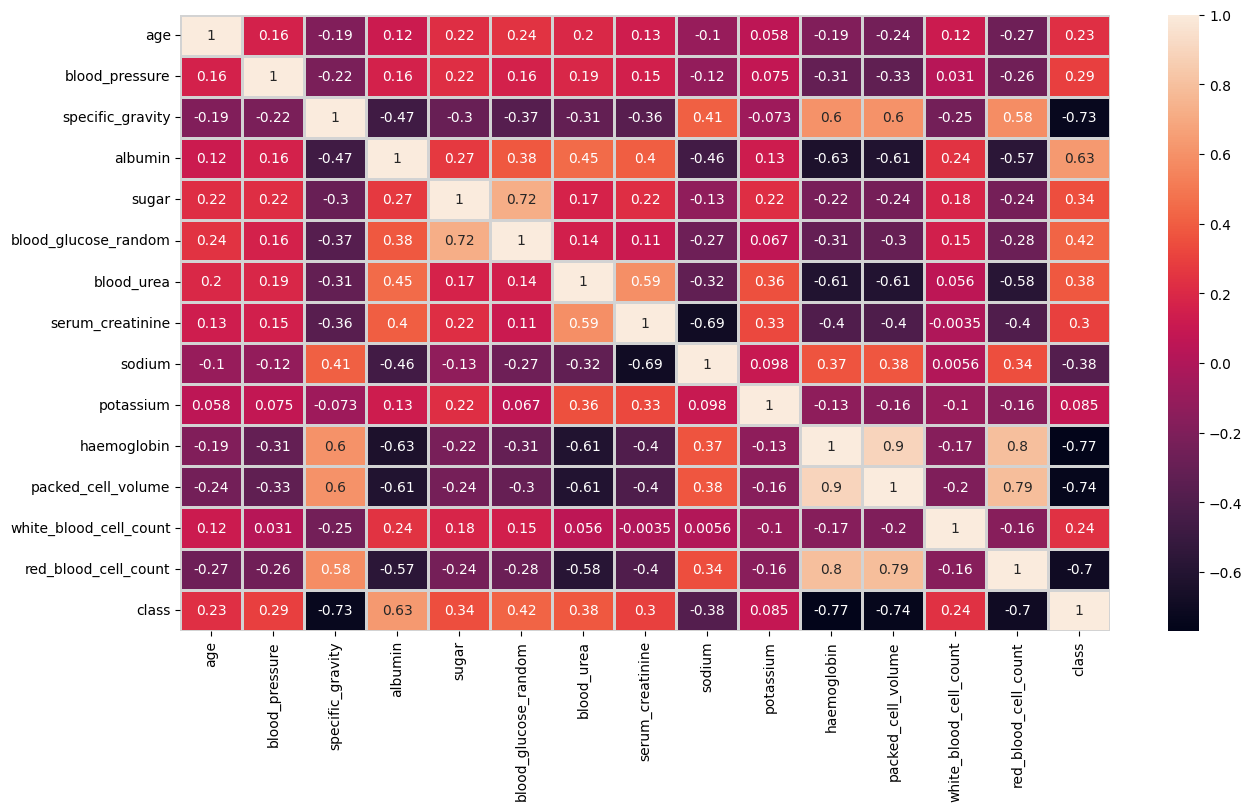

In [21]:
# heatmap of data for correlation check

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [22]:
# checking the null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     108
potassium                   88
sodium                      87
packed_cell_volume          72
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
diabetes_mellitus            8
bacteria                     4
pus_cell_clumps              4
coronary_artery_disease      4
hypertension                 2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [23]:
# checking the null values in numerical columns
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         72
white_blood_cell_count    108
red_blood_cell_count      131
dtype: int64

In [24]:
# checking the null values in categorical columns
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            8
coronary_artery_disease      4
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
#replacing categorical missing values with mode. So we need to find mode of categorical fields
for col in cat_cols:
    print(f"{col} : {df[col].mode()} values\n")

red_blood_cells : 0    normal
Name: red_blood_cells, dtype: object values

pus_cell : 0    normal
Name: pus_cell, dtype: object values

pus_cell_clumps : 0    notpresent
Name: pus_cell_clumps, dtype: object values

bacteria : 0    notpresent
Name: bacteria, dtype: object values

hypertension : 0    no
Name: hypertension, dtype: object values

diabetes_mellitus : 0    no
Name: diabetes_mellitus, dtype: object values

coronary_artery_disease : 0    no
Name: coronary_artery_disease, dtype: object values

appetite : 0    good
Name: appetite, dtype: object values

peda_edema : 0    no
Name: peda_edema, dtype: object values

aanemia : 0    no
Name: aanemia, dtype: object values

class : 0    1
Name: class, dtype: int64 values



In [26]:
#replacing categorical missing values with mode strategy
df['red_blood_cells'] = df['red_blood_cells'].replace(np.NaN, 'normal')
df['pus_cell'] = df['pus_cell'].replace(np.NaN, 'normal')
df['pus_cell_clumps'] = df['pus_cell_clumps'].replace(np.NaN, 'notpresent')
df['bacteria'] = df['bacteria'].replace(np.NaN, 'notpresent')
df['hypertension'] = df['hypertension'].replace(np.NaN, 'no')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(np.NaN, 'no')
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(np.NaN, 'no')
df['appetite'] = df['appetite'].replace(np.NaN, 'good')
df['peda_edema'] = df['peda_edema'].replace(np.NaN, 'no')
df['aanemia'] = df['aanemia'].replace(np.NaN, 'no')


In [27]:
# checking the null values in numerical columns
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [28]:
#Imputing numerical Null values with KNN imputer

In [29]:
from sklearn.impute import KNNImputer

In [30]:
Imputer = KNNImputer(n_neighbors=2)

In [31]:
df[num_cols] = Imputer.fit_transform(df[num_cols])

In [32]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [33]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



### Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. The following code loops through each categorical column and converts those columns into  categorical.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [35]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [1 0] values

pus_cell has [1 0] values

pus_cell_clumps has [0 1] values

bacteria has [0 1] values

hypertension has [1 0] values

diabetes_mellitus has [1 0] values

coronary_artery_disease has [0 1] values

appetite has [0 1] values

peda_edema has [0 1] values

aanemia has [0 1] values

class has [1 0] values



### Extracting the target column into separate vectors for training set and test set

In [36]:
X = df.drop('class',axis=1)
y = df.pop('class')

In [37]:
#checking the target values distribution
y.value_counts()

1    250
0    150
Name: class, dtype: int64

### Splitting data into training and test set into 30% test data and stratify to  ensure that the training and test datasets have the same proportion of class labels as the input dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [39]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',280+120)

X_train (280, 24)
X_test (120, 24)
y_train (280,)
y_test (120,)
Total Obs 400


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting up the Model Runs

## Configure your Azure ML workspace

https://github.com/shambhaviKPrasad/MachineLearningNotebooks/blob/7a3ab1e44cb6d07325f1df8719dd8f76e59dbb4d/configuration.ipynb

The workspace is the top-level resource for Azure Machine Learning, providing a centralized place to work with all the artifacts you create when you use Azure Machine Learning.

## Access your workspace

### Download the config.json file for the resource from the Portal.

In [41]:
# Read the config.json file to connect to your workspace from local notebook
from azureml.core import Workspace

In [44]:
ws = Workspace.from_config()

Performing interactive authentication. Please follow the instructions on the terminal.


Interactive authentication successfully completed.


In [45]:
# Authenticate your tenant to connect to Microsoft CLI
from azureml.core.authentication import InteractiveLoginAuthentication


In [46]:
interactive_auth = InteractiveLoginAuthentication(tenant_id="d02378ec-1688-46d5-8540-1c28b5f470f6")

## Create new experiment
Now create an experiment in your workspace. An experiment is another foundational cloud resource that represents a collection of trials (individual model runs).

In [47]:
from azureml.core import Experiment
experiment = Experiment(workspace = ws, name="diabetes-prediction-using-python-sdk")

In [48]:
# set name for logging
mlflow.set_experiment("diabetes-prediction-using-python-sdk")
# enable autologging with MLflow
mlflow.sklearn.autolog()

2024/03/20 15:26:21 INFO mlflow.tracking.fluent: Experiment with name 'diabetes-prediction-using-python-sdk' does not exist. Creating a new experiment.


## Copy your Tenant ID to connect to Microsoft CLI.

Search for **Microsoft Entra** to locate your tenant ID.

## RANDOM FOREST CLASSIFIER

### With default paramters

In [49]:
# Model 1:

# instantiate the 'Random Forest classifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code

# log each run of the experiment by using mlflow then invoking the start_logging method of the experient
# after each run has completed, call the end_run method of ml_flow to close it.
mlflow.end_run()
mlflow.start_run()
run = experiment.start_logging()

rfcl = RandomForestClassifier(random_state=42)
run.log("criterion", 'gini')

# fit the model using fit() on train data
RF = rfcl.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))

# Logging all metrics of classification_report
cr = classification_report(y_test, y_pred, output_dict=True)
run.log("accuracy", cr.pop("accuracy"))
for class_or_avg, metrics_dict in cr.items():
      for metric, value in metrics_dict.items():
          run.log(class_or_avg + '_' + metric,value)

model_name = "model_criterion_" + 'gini' + ".pkl"
filename = "outputs/" + model_name

joblib.dump(value=RF, filename=filename)
run.upload_file(name=model_name, path_or_stream=filename)
run.complete()

mlflow.end_run()

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        75

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Retreive the link to the experiment in Azure ML Studio

In [50]:
experiment

Name,Workspace,Report Page,Docs Page
diabetes-prediction-using-python-sdk,Task_3P_ML_workspace,Link to Azure Machine Learning studio,Link to Documentation


## View the Experiment in Azure ML Studio.
1. On opening the link, you will see the experiment defined above.
2. The experiment name will be the same as defined above.
3. Each run will be displayed by a random name.
4. Click on a run to view the metrics and output files generated.

In [ ]:
## Create a new model by tuning the hyperparameters with Grid Search CV

In [51]:
# Model 2: Hyperparameter tuning using Grid Search:

# create a dictionary with hyperparameters and its values
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
mlflow.end_run()
mlflow.start_run()

run = experiment.start_logging()
param_grid = {"criterion" :['gini','entropy'],
    'max_depth': [2, 4,5,6],
    'max_features': [4,5,6,7],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [4,5,6,7],
    'n_estimators': [50, 100]}


# instantiate the 'Random Forest Classifier'
# pass the 'random_state' to obtain the same samples for each time you run the code

rfcl_gscv = RandomForestClassifier(random_state=42)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
grid_search1 = GridSearchCV(estimator = rfcl_gscv,
                         param_grid = param_grid,
                         cv = 3)

# fit the model on X_train and y_train using fit()
grid_search_model = grid_search1.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Random Forest classifier: ', grid_search_model.best_params_, '\n')
mlflow.end_run()

2024/03/20 15:38:10 INFO mlflow.sklearn.utils: Logging the 5 best runs, 1019 runs will be omitted.


Best parameters for Random Forest classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100} 



In [52]:
# instantiate the 'Random Forest Classifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
mlflow.start_run()
Final_model = RandomForestClassifier(criterion = grid_search_model.best_params_.get('criterion'),
                                  max_depth = grid_search_model.best_params_.get('max_depth'),
                                  max_features = grid_search_model.best_params_.get('max_features'),
                                  max_leaf_nodes = grid_search_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = grid_search_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = grid_search_model.best_params_.get('min_samples_split'),
                                  random_state = 42)

run.log("criterion", grid_search_model.best_params_.get('criterion'))
run.log("max_depth", grid_search_model.best_params_.get('max_depth'))
run.log('max_features', grid_search_model.best_params_.get('max_features'))
run.log('max_leaf_nodes', grid_search_model.best_params_.get('max_leaf_nodes'))
run.log('min_samples_leaf',grid_search_model.best_params_.get('min_samples_leaf'))
run.log('min_samples_split', grid_search_model.best_params_.get('min_samples_split'))
run.log('random_state', 42)


# use fit() to fit the model on the train set
Final_model = Final_model.fit(X_train, y_train)

y_pred = Final_model.predict(X_test)

# viewing the classification report
print(classification_report(y_test, y_pred))

# Logging all metrics in classification_report
cr = classification_report(y_test, y_pred, output_dict=True)
run.log("accuracy", cr.pop("accuracy"))
for class_or_avg, metrics_dict in cr.items():
      for metric, value in metrics_dict.items():
          run.log(class_or_avg + '_' + metric,value)

model_name = "best_tuned_model" + ".pkl"
filename = "outputs/" + model_name

joblib.dump(value=Final_model, filename=filename)
run.upload_file(name=model_name, path_or_stream=filename)
run.complete()

mlflow.end_run()

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        75

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



## Retreive the link to the experiment in Azure ML Studio

In [ ]:
experiment

Name,Workspace,Report Page,Docs Page
diabetes-prediction-using-python-sdk,Task_3P_ML_workspace,Link to Azure Machine Learning studio,Link to Documentation


## View the Experiment in Azure ML Studio.
1. On opening the link, you will see the experiment defined above.
2. The experiment name will be the same as defined above.
3. Each run will be displayed by a random name.
4. Click on a run to view the metrics and output files generated.

Model Deplyment

#Workflow for deploying a model
The workflow is similar no matter where you deploy your model:

Register the model.

Prepare an entry script.

Prepare an inference configuration.

Deploy the model locally to ensure everything works.

Choose a compute target.

Deploy the model to the cloud.

Test the resulting web service.

##Register a model from a local file

In [54]:
from azure.ai.ml import MLClient

In [56]:
from azure.ai.ml.entities import Model

In [61]:
ml_client = MLClient(DefaultAzureCredential(), "d509573c-4478-46f1-8c6a-494c5ef6880b", "Task_3P")

In [64]:
from azure.ai.ml.entities import Model
from azure.ai.ml.constants import AssetTypes

file_model = Model(
    path="mlflow-model/best_tuned_model.pkl",
    type=AssetTypes.CUSTOM_MODEL,
    name="local-file-example",
    description="Model created from local file.",
)


In [65]:
ml_client.models.create_or_update(file_model)

ValueError: No value for given attribute